# Práctica 3 - Belén Rodríguez Llorente & Octavian Rotita Ion

Las librerias a usar en esta práctica son las siguientes:

In [ ]:
!pip install scipy
!pip install numpy
!pip install sympy
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 77.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, cot, lambdify, Matrix, diff, Eq, nonlinsolve
import math
from math import e,sqrt # Importación de funciones matemáticas estándar
from sympy.plotting import plot, plot3d, plot3d_parametric_line # Para gráficos 3D y otros gráficos simbólicos
# Librerías adicionales para la optimización:
import scipy
from scipy.optimize import linprog, approx_fprime,minimize
# Para optimización lineal con pulp:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value,PULP_CBC_CMD
import pulp as plp

# Ejercicio 1

Para el siguiente problema, extraído del libro de Bazaraa “NonLinear Programming, theory and algorithms”:

 min     $2x^2+2y^2-2xy-4x-6y$

 s.a:

   $x + 5*y <= 5$

   $2x^2 - y <=0$

   $x,y >=0$

#### a) Determina los puntos KKT e identifica cuál es el óptimo. Hazlo mediante Python (sugiero que uses la librería sympy)

In [ ]:
# Definimos las variables y la función objetivo a minimizar
x, y = symbols('x y', real=True)
f = 2*x**2 + 2*y**2 - 2*x*y - 4*x - 6*y

# Definimos las restricciones
g1 = x + 5*y - 5
g2 = 2*x**2 - y
g3 = -x
g4 = -y

lambda1, lambda2, lambda3, lambda4 = symbols('lambda1 lambda2 lambda3 lambda4', real=True)
Lang = f + lambda1*g1 + lambda2*g2 + lambda3*g3 + lambda4*g4 # Calculamos el langrangiano

# Calculamos el gradiente del lagrangiano
grad_Lang_x = diff(Lang, x) # respecto a x
grad_Lang_y = diff(Lang, y) # respecto a y

# condiciones KKT salvo inecuaciones, es decir, condiciones del gradiente y de normalidad
kkt_equations = [
 # condición del gradiente (1º condición según los apuntes teóricos del tema 3 para ser punto KKT)
    Eq(grad_Lang_x, 0), # respecto a x
    Eq(grad_Lang_y, 0), # respecto a y
  #condición de ortogonalidad (2ª condición según los apuntes teóricos del tema 3 para ser punto KKT)
    Eq(lambda1 * g1, 0),
    Eq(lambda2 * g2, 0),
    Eq(lambda3 * g3, 0),
    Eq(lambda4 * g4, 0),
    g1,
    g2
]

# Resolver solo con las condiciones de igualdad de ser un punto KKT
soluciones_sin_filtro = nonlinsolve(kkt_equations, (x, y, lambda1, lambda2, lambda3, lambda4))

soluciones = [ sol for sol in soluciones_sin_filtro
    if (sol[2] >= 0 and sol[3] >= 0 and sol[4] >= 0 and sol[5] >= 0) # Condición de no negatividad
    and (g1.subs({x: sol[0], y: sol[1]}) <= 0 and g2.subs({x: sol[0], y: sol[1]}) <= 0 and g3.subs({x: sol[0], y: sol[1]}) <= 0 and g4.subs({x: sol[0], y: sol[1]}) <= 0) # Condición de factibilidad
              ]

print(f"Los puntos (x,y) KKT encontrados son: ({soluciones[0][0]},{soluciones[0][1]} )" )
print (f"y cuyos multiplicadores de Lagrange asociados son: \nλ1:{soluciones[0][2]},\nλ2:{soluciones[0][3]},\nλ4:{soluciones[0][4]},\nλ5:{soluciones[0][5]}")

# Mostrar resultados aproximados en formato decimal para x y y
print(f"Los puntos KKT son aproximadamente : ")
print(f"(x,y) = ( {float(soluciones[0][0]):.4f}, {float(soluciones[0][1]):.4f} )")

Los puntos (x,y) KKT encontrados son: (-1/20 + sqrt(201)/20,101/100 - sqrt(201)/100 )
y cuyos multiplicadores de Lagrange asociados son: 
λ1:31/250 + 2869*sqrt(201)/50250,
λ2:-31/25 + 731*sqrt(201)/5025,
λ4:0,
λ5:0
Los puntos KKT son aproximadamente : 
(x,y) = ( 0.6589, 0.8682 )


In [ ]:
from sympy import symbols, Eq, diff, solve, S, I, re, im

# Definir variables
x, y = symbols('x y', real=True)
lambda1, lambda2, lambda3, lambda4 = symbols('lambda1 lambda2 lambda3 lambda4', real=True, nonnegative=True)

# Función objetivo y restricciones
f = 2*x**2 + 2*y**2 - 2*x*y - 4*x - 6*y
g1 = x + 5*y - 5
g2 = 2*x**2 - y
g3 = -x
g4 = -y

# Lagrangiano
Lang = f + lambda1*g1 + lambda2*g2 + lambda3*g3 + lambda4*g4

# Gradiente del Lagrangiano
grad_Lang_x = diff(Lang, x)
grad_Lang_y = diff(Lang, y)

# Condiciones KKT
kkt_equations = [
    Eq(grad_Lang_x, 0),  # Condición de gradiente respecto a x
    Eq(grad_Lang_y, 0),  # Condición de gradiente respecto a y
    Eq(lambda1 * g1, 0),  # Condición de ortogonalidad (λ1 * g1 = 0)
    Eq(lambda2 * g2, 0),  # Condición de ortogonalidad (λ2 * g2 = 0)
    Eq(lambda3 * g3, 0),  # Condición de ortogonalidad (λ3 * g3 = 0)
    Eq(lambda4 * g4, 0),  # Condición de ortogonalidad (λ4 * g4 = 0)
]

# Resolver el sistema de ecuaciones simbólicamente
soluciones_sin_filtro = solve(kkt_equations, (x, y, lambda1, lambda2, lambda3, lambda4),domain=S.Reals, dict=True)
soluciones_reales = []
for sol in soluciones_sin_filtro:
    # Verificar si x, y y los multiplicadores de Lagrange son reales
    x_sol = sol[x]
    y_sol = sol[y]

    # Validar que no hay componentes imaginarias en x, y, y los multiplicadores
    if im(x_sol) == 0 and im(y_sol) == 0 and all(im(l) == 0 for l in [sol[lambda1], sol[lambda2], sol[lambda3], sol[lambda4]]):
        soluciones_reales.append(sol)

# Filtrar soluciones factibles
soluciones = [sol for sol in soluciones_reales
              if sol[lambda1] >= 0 and sol[lambda2] >= 0 and sol[lambda3] >= 0 and sol[lambda4] >= 0  # Condición de no negatividad
              and (g1.subs({x: sol[x], y: sol[y]}) <= 0 and g2.subs({x: sol[x], y: sol[y]}) <= 0 and g3.subs({x: sol[x], y: sol[y]}) <= 0 and g4.subs({x: sol[x], y: sol[y]}) <= 0)]  # Condición de factibilidad

# Mostrar resultados
if soluciones:
    for sol in soluciones:
        print(f"Los puntos (x, y) KKT encontrados son: ({sol[x]},{sol[y]})")
        print(f"Y cuyos multiplicadores de Lagrange asociados son:")
        print(f"λ1: {sol[lambda1]}, λ2: {sol[lambda2]}, λ3: {sol[lambda3]}, λ4: {sol[lambda4]}")
        print(f"Los puntos KKT son aproximadamente:")
        print(f"(x, y) = ({float(sol[x]):.4f}, {float(sol[y]):.4f})")
else:
    print("No se encontraron soluciones factibles.")


Los puntos (x, y) KKT encontrados son: (-1/20 + sqrt(201)/20,101/100 - sqrt(201)/100)
Y cuyos multiplicadores de Lagrange asociados son:
λ1: 31/250 + 2869*sqrt(201)/50250, λ2: -31/25 + 731*sqrt(201)/5025, λ3: 0, λ4: 0
Los puntos KKT son aproximadamente:
(x, y) = (0.6589, 0.8682)


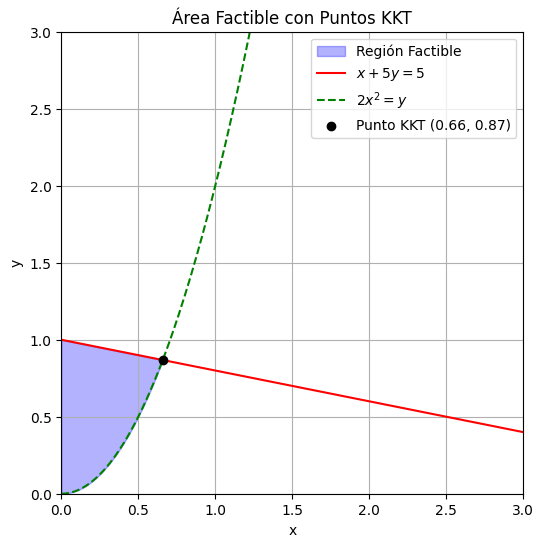

In [ ]:
# Definir los límites del gráfico
x_vals = np.linspace(0, 3, 400)

# representamos además los puntos KKT que ya están calculados, así se observarán que están dentro de la región coloreada.
x_kkt = float(soluciones[0][0])  # Convertir a float por ya que están en forma simbólica
y_kkt = float(soluciones[0][1])

# Restricción 1: x + 5*y <= 5 (línea recta)
y1 = (5 - x_vals) / 5

# Restricción 2: 2*x^2 <= y (parábola)
y2 = 2 * x_vals**2

# Restricciones de no negatividad
y_lower_bound = np.zeros_like(x_vals)  # y >= 0

# Región factible: y1 >= y2 y ambas mayores o iguales a 0
factible_mask = (y1 >= y2) & (y2 >= y_lower_bound)

# Graficar la región factible
plt.figure(figsize=(6, 6))

# Área factible: entre y1 y y2, limitado por y_lower_bound
plt.fill_between(x_vals, y2, y1, where=factible_mask, color='blue', alpha=0.3, label='Región Factible')

# Graficar las restricciones
plt.plot(x_vals, y1, label=r'$x + 5y = 5$', color='red')  # Restricción 1
plt.plot(x_vals, y2, label=r'$2x^2 = y$', color='green', linestyle='--')  # Restricción 2

# graficar los puntos KKT
plt.scatter(x_kkt, y_kkt, color='black', label=f'Punto KKT ({x_kkt:.2f}, {y_kkt:.2f})', zorder=5)

# Etiquetas y título
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Área Factible con Puntos KKT')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### b) Automatízalo en la medida de lo posible para aplicarlo a otros problemas

In [ ]:
from sympy import symbols, diff, Eq, solve

# Definimos la función kkt_solver con un paso de diagnóstico
def kkt_solver_1(f, constraints, variables):
    # Número de restricciones
    num_restricciones = len(constraints)

    # Crear símbolos lambda para los multiplicadores de Lagrange
    lambdas = [symbols(f'lambda_{i}', real=True, nonnegative=True) for i in range(num_restricciones)]

    # Definimos el Lagrangiano
    L = f
    for i in range(len(constraints)):
        L += lambdas[i] * constraints[i]

    # Gradientes del Lagrangiano respecto a las variables
    grad_L = [diff(L, var) for var in variables]

    # Condiciones de KKT
    kkt_equations = [Eq(grad, 0) for grad in grad_L]  # Gradiente del Lagrangiano igual a cero
    for i, constraint in enumerate(constraints):
        kkt_equations.append(Eq(lambdas[i] * constraint, 0))  # Condición de ortogonalidad

    # Resolvemos el sistema utilizando solve
    solution_vars = variables + lambdas
    solutions_no_filtro = solve(kkt_equations, solution_vars, dict=True)

    # Ver soluciones sin filtrar
    print(len(solutions_no_filtro), "Soluciones sin filtrar:", ": ", solutions_no_filtro)

    # Filtrar soluciones que cumplen las restricciones de no negatividad de multiplicadores y condición de factibilidad
    solutions = []
    for sol in solutions_no_filtro:
        # Validar la no negatividad de los multiplicadores
        if all(sol[l] >= 0 for l in lambdas):  # Accedemos a los multiplicadores por sus nombres
            # Validar las restricciones de factibilidad
            valid_solution = True
            for i, constraint in enumerate(constraints):
                if constraint.subs({variables[j]: sol[variables[j]] for j in range(len(variables))}) > 0:
                    valid_solution = False
                    break
            if valid_solution:
                solutions.append(sol)

    # Lista para almacenar solo los puntos (x, y) de cada solución válida
    puntos_validos = []

    # Imprimir soluciones KKT encontradas
    if solutions:
        for idx, sol in enumerate(solutions, 1):
            print(f"Solución {idx}:")
            for i, var in enumerate(solution_vars):
                print(f"{var}: {sol[var]}")
            print("\n")
            # Agregar solo el par (x, y) a la lista de puntos válidos
            puntos_validos.append((sol[x], sol[y]))
    else:
        print("No se encontraron soluciones que cumplan con las condiciones KKT y restricciones de no negatividad.")

    # Imprimir lista final de puntos (x, y) válidos
    print("Lista de puntos (x, y) válidos:")
    for punto in puntos_validos:
        print(punto)

    return puntos_validos  # la salida del solver es una lista con todos los puntos validos KKT que cumplen todas las condiciones y restricciones del problema


Veamos el primer ejemplo que se nos propone:

mín $(x - 3)^2 + (y - 2)^2$

 sujeto a:

   $x^2 + y^2 <= 5$

   $x + 2y <= 4$

   $x,y >=0$

4 Soluciones sin filtrar: :  [{lambda_0: 0, lambda_1: 0, lambda_2: 0, lambda_3: 0, x: 3, y: 2}, {lambda_0: 0, lambda_1: 6/5, lambda_2: 0, lambda_3: 0, x: 12/5, y: 4/5}, {lambda_0: 1/3, lambda_1: 2/3, lambda_2: 0, lambda_3: 0, x: 2, y: 1}, {lambda_0: -1 + sqrt(65)/5, lambda_1: 0, lambda_2: 0, lambda_3: 0, x: 3*sqrt(65)/13, y: 2*sqrt(65)/13}]
Solución 1:
x: 2
y: 1
lambda_0: 1/3
lambda_1: 2/3
lambda_2: 0
lambda_3: 0


Lista de puntos (x, y) válidos:
(2, 1)


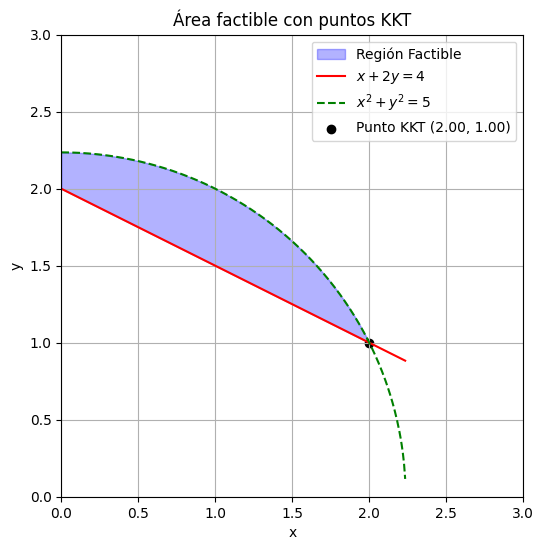

In [ ]:
# Variables del problema
x, y = symbols('x y', real=True)

# Función objetivo
f = (x - 3)**2 + (y - 2)**2

# Restricciones
constraints = [
    x**2 + y**2 - 5,   # x^2 + y^2 <= 5
    x + 2*y - 4,
    -x,
    -y
]

# Aplicamos kkt_solver para el problema específico
puntos_kkt=kkt_solver_1(f, constraints, [x, y])

# Graficamos :


# Definir los límites del gráfico
x_vals = np.linspace(0, 3, 400)

# Filtrar valores de x_vals donde la raíz cuadrada es válida
valid_mask = x_vals**2 <= 5  # Condición para que 5 - x_vals**2 sea >= 0
x_vals_valid = x_vals[valid_mask]

# Restricción 1: x^2 + y^2 <= 5 (círculo)
y2_positive = np.sqrt(5 - x_vals_valid**2)  # Semicírculo superior

# Restricción 2: x + 2*y <= 4 (línea recta)
# Use x_vals_valid here to ensure the shapes match
y1 = (4 - x_vals_valid) / 2

# Restricciones de no negatividad
y_lower_bound = np.zeros_like(x_vals_valid)  # y >= 0

# Graficar la región factible
plt.figure(figsize=(6, 6))

# Área factible: entre y1 y el semicírculo, limitado por y_lower_bound
# Use x_vals_valid for the x-coordinates
plt.fill_between(x_vals_valid, y1, y2_positive, where=(y2_positive >= y1), color='blue', alpha=0.3, label='Región Factible')

# Graficar las restricciones
# Use x_vals_valid here as well
plt.plot(x_vals_valid, y1, label=r'$x + 2y = 4$', color='red')  # Restricción 2
plt.plot(x_vals_valid, y2_positive, label=r'$x^2 + y^2 = 5$', color='green', linestyle='--')  # Restricción 1

# Graficar los puntos KKT
for x_kkt, y_kkt in puntos_kkt:
    x_num = float(x_kkt)  # Convertir de simbólico a numérico si no lo es
    y_num = float(y_kkt)
    plt.scatter(x_num, y_num, color='black', label=f'Punto KKT ({x_num:.2f}, {y_num:.2f})')


# Etiquetas y título
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Área factible con puntos KKT')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Veamos el segundo ejemplo que se nos propone:

mín $2x-y$

 sujeto a:

   $x^2 + y^2 <= 5$

   $(x-1)^2+y-5<=0$

   $y >=0$

4 Soluciones sin filtrar: :  [{lambda_0: 0, lambda_1: 1, lambda_2: 0, x: 0, y: 4}, {lambda_0: 1/3, lambda_1: 2/3, lambda_2: 0, x: -1, y: 1}, {lambda_0: 2/3, lambda_1: 1/3, lambda_2: 0, x: 2, y: 4}, {lambda_0: 1, lambda_1: 0, lambda_2: 0, x: 1, y: 1}]
Solución 1:
x: -1
y: 1
lambda_0: 1/3
lambda_1: 2/3
lambda_2: 0


Solución 2:
x: 2
y: 4
lambda_0: 2/3
lambda_1: 1/3
lambda_2: 0


Solución 3:
x: 1
y: 1
lambda_0: 1
lambda_1: 0
lambda_2: 0


Lista de puntos (x, y) válidos:
(-1, 1)
(2, 4)
(1, 1)


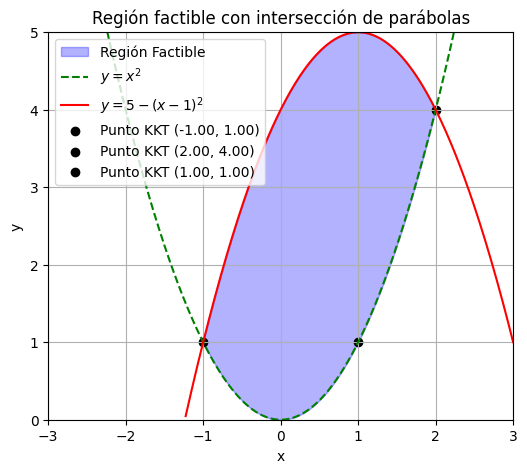

In [ ]:
# Variables del problema
x, y = symbols('x y', real=True)

# Función objetivo
f = 2 * x - y

# Restricciones
constraints = [
    -x**2 + y,  # -x^2 + y <= 0 (equivalente a x^2 - y >= 0)
    (x - 1)**2 + y - 5,  # (x-1)^2 + y <= 5
    -y
]

# Aplicamos KKT
puntos_kkt = kkt_solver_1(f, constraints, [x, y])


# Graficamos :
x_vals = np.linspace(-3, 3, 400)
y1 = x_vals**2

# Restricción 2: (x-1)^2 + y <= 5 => y = 5 - (x-1)^2
valid_mask_2 = (5 - (x_vals - 1)**2) >= 0  # Verifica que no sean valores complejos
x_vals_valid_2 = x_vals[valid_mask_2]
y2 = 5 - (x_vals_valid_2 - 1)**2

# Restricción 3: y >= 0
y_lower_bound = np.zeros_like(x_vals)  # Línea y = 0

# Ajustar región factible: intersección entre las dos parábolas
feasible_x = x_vals[(x_vals**2 <= (5 - (x_vals - 1)**2)) & (x_vals**2 >= 0)]
feasible_y1 = feasible_x**2  # Límite inferior (y = x^2)
feasible_y2 = 5 - (feasible_x - 1)**2  # Límite superior (y = 5 - (x-1)^2)

# Graficar la región factible corregida
plt.figure(figsize=(6, 6))
plt.fill_between(feasible_x, feasible_y1, feasible_y2, color='blue', alpha=0.3, label='Región Factible')

# Graficar las restricciones
plt.plot(x_vals, x_vals**2, label=r'$y = x^2$', color='green', linestyle='--')  # Restricción 1
plt.plot(x_vals_valid_2, 5 - (x_vals_valid_2 - 1)**2, label=r'$y = 5 - (x-1)^2$', color='red')  # Restricción 2

# Puntos KKT aproximados (para referencia visual)
for x_kkt, y_kkt in puntos_kkt:
    plt.scatter(x_kkt, y_kkt, color='black', label=f'Punto KKT ({x_kkt:.2f}, {y_kkt:.2f})')

# Configuración gráfica
plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Región factible con intersección de parábolas')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### c) Resuelve alguno de los problemas en papel, siguiendo el método que hemos comentado en clase.

Min $$y-x$$

s.a.: $$x^2 + y^2 \leq 4$$
$$(x+1)^2 + y^2 \leq 4$$

El lagrangiano del problema es:
$$ L = y-x+\lambda_1(x^2+y^2-4)+\lambda_2[(x+1)^2+y^2-4]$$

Las condiciones KKT imponen lo siguiente:

1. Condición de gradiente:
  - $-1+2x\lambda_1 + 2 \lambda_2 (x+1)=0$
  - $1+2y\lambda_1 + 2\lambda_2 y = 0$
2. Condición de ortogonalidad:
  - $\lambda_1(x^2+y^2-4)=0$
  - $\lambda_2 (x^2+y^2-4)=0$
3. Condición de factibilidad:
  - $x^2+y^2-4 \leq 0$
  - $(x+1)^2+y^2-4 \leq 0$
4. Condición de no negatividad:
  - $\lambda_1, \lambda_2 \geq 0$

### Caso 1: $\lambda_1 = 0, \lambda_2 \neq 0$

Este caso no cumple la condición de gradiente, ya que:
$$ $-1+2x\lambda_1 + 2 \lambda_2 (x+1)=0$ \iff -1 \neq 0 $$
$$ 1+2y\lambda_1 + 2\lambda_2 y = 0 \iff 1 \neq 0 $$

### Caso 2: $\lambda_1 = 0, \lambda_2 \neq 0$
Las ecuaciones a resolver son las siguientes:

(1) $-1+2\lambda_2(x+1)=0$

(2) $1+2\lambda_2y=0$

(3) $\lambda_2 ((x+1)^2+y^2-4)=0$

Combinando (1) y (2) podemos conseguir que $-y=x+1$.

De (3) sabemos que $(x+1)^2+y^2-4=0$, ya que $\lambda_2 \neq 0$, luego $(-y)^2+y^2-4=0 \iff y = \pm \sqrt{2}$

Como se tiene que cumplir que $2\lambda_2 y = -1$, tenemos que quedarnos con la solución negativa de $y$, para que se cumpla la condición de no negatividad. De esto se deduce que $x = \sqrt{2}-1$.

El punto propuesto es $\mathbf{x}_1 = (\sqrt{2}-1,-\sqrt{2})$

Si sustituimos en (2): $\lambda_2 = \frac{-1}{2y} = \frac{\sqrt{2}}{4} \geq 0$. Como se cumplen todas las condiciones KKT, el punto es una solución propuesta.

### Caso 3: $\lambda_2 = 0, \lambda_1 \neq 0$
Las ecuaciones a resolver son las siguientes:

(1) $-1+2x\lambda_1=0$

(2) $1+2\lambda_1y=0$

(3) $\lambda_1 (x^2+y^2-4)=0$

Combinando (1) y (2) podemos conseguir que $x=-y$.

De (3) sabemos que $x^2+y^2-4=0$, ya que $\lambda_1 \neq 0$, luego $x^2+y^2-4=0 \iff 2x^2-4=0 \iff x = \pm \sqrt{2}$. La solución valida es $x = + \sqrt{2}$ porque sino implica que $\lambda_1 < 0$, lo que está en discordancia con la condición de no negatividad. Así, $y = -\sqrt{2}$.

No obstante, es fácil ver que este punto no cumple la condición de factibilidad.

### Caso 4: $\lambda_1 \neq 0, \lambda_2 \neq 0$
Las ecuaciones a resolver son las siguientes:

(1) $-1+2x\lambda_1+2\lambda_2(x+1)=0$

(2) $1+2y\lambda_1+2\lambda_2y=0$

(3) $\lambda_1(x^2+y^2-4)=0$

(4) $\lambda_2((x+1)^2+y^2-4)=0$

Como $\lambda_1 \neq 0$ y $\lambda_2 \neq 0$, podemos igualar las expresiones de (3) y (4): $x^2+y^2-4=(x+1)^2+y^2-4 \iff x^2 = (x+1)^2 \iff x^2 = x^2 +2x+1 \iff x = -1/2$

Luego de (3): $\frac{1}{4} + y^2 -4 = 0 \iff y = \pm \frac{\sqrt{15}}{2}$.

#### Caso 4.1.: $ y = + \frac{\sqrt{15}}{2}$
Las ecuaciones (1) y (2) se reducen a:

(1) $-1-1\lambda_1 + 2\lambda_2=0 iff 2\lambda_2 = 1+\lambda_1$
(2) $1+2\frac{\sqrt{15}}{2}\lambda_1 + 2\lambda_2 \frac{\sqrt{15}}{2} = 0$

Si introducimos (1) en (2): $1+\frac{\sqrt{15}}{2}\lambda_1+(1+\lambda_1)\frac{\sqrt{15}}{2}=0 \iff \lambda_1 < 0$. Por tanto, no se cumple la condición de no negatividad.

#### Caso 4.1.: $ y = - \frac{\sqrt{15}}{2}$

En este caso con (1) y (2) lo que tenemos es:

$1-\frac{\sqrt{15}}{2}\lambda_1 + (1+\lambda_1)(-\frac{\sqrt{15}}{2})=0 \iff (1-\frac{\sqrt{15}}{2})-2\frac{\sqrt{15}}{2}\lambda_1 = 0 \iff \lambda_1 < 0$. Esta solución tampoco cumple la condición de no negatividad.

En conclusión, la única solución encontrada que cumpla las restricciones KKT es $\mathbf{x}_1 = (\sqrt{2}-1,-\sqrt{2})$.

6 Soluciones sin filtrar: :  {(-1/2, -sqrt(15)/2, -1/2 + sqrt(15)/30, sqrt(15)/30 + 1/2), (-1/2, sqrt(15)/2, -1/2 - sqrt(15)/30, 1/2 - sqrt(15)/30), (-sqrt(2), sqrt(2), -sqrt(2)/4, 0), (sqrt(2), -sqrt(2), sqrt(2)/4, 0), (-1 + sqrt(2), -sqrt(2), 0, sqrt(2)/4), (-sqrt(2) - 1, sqrt(2), 0, -sqrt(2)/4)}
Solución 1:
x: -1 + sqrt(2)
y: -sqrt(2)
lambda_0: 0
lambda_1: sqrt(2)/4


Lista de puntos (x, y) válidos:
(-1 + sqrt(2), -sqrt(2))


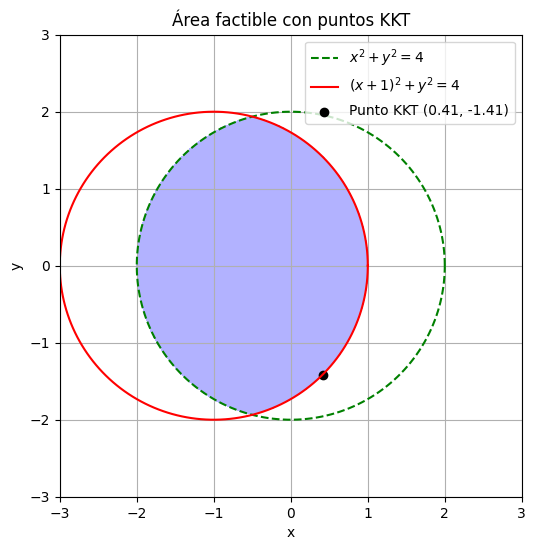

In [ ]:
# Variables del problema
x, y = symbols('x y', real=True)

# Función objetivo
f = y-x

# Restricciones
constraints = [
    x**2 + y**2 - 4,
    (x+1)**2 + y**2 - 4
]

# Aplicamos kkt_solver para el problema específico
puntos_kkt=kkt_solver_1(f, constraints, [x, y])

# Generamos datos para graficar las restricciones
theta = np.linspace(0, 2 * np.pi, 400)
x1_circle = 2 * np.cos(theta)
y1_circle = 2 * np.sin(theta)

x2_circle = 2 * np.cos(theta) - 1  # Centro desplazado a (-1, 0)
y2_circle = 2 * np.sin(theta)

# Máscara para encontrar región factible
x_vals = np.linspace(-3, 2, 400)
y_vals = np.linspace(-3, 3, 400)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
constraint1 = x_grid**2 + y_grid**2 <= 4
constraint2 = (x_grid + 1)**2 + y_grid**2 <= 4
feasible_region = constraint1 & constraint2

# Graficar
plt.figure(figsize=(6, 6))
plt.contourf(x_vals, y_vals, feasible_region, levels=[0.5, 1.5], colors=['blue'], alpha=0.3)

# Graficar restricciones
plt.plot(x1_circle, y1_circle, label=r'$x^2 + y^2 = 4$', color='green', linestyle='--')
plt.plot(x2_circle, y2_circle, label=r'$(x+1)^2 + y^2 = 4$', color='red')

# Graficar puntos KKT
for x_kkt, y_kkt in puntos_kkt:
    x_num = float(x_kkt)
    y_num = float(y_kkt)
    plt.scatter(x_num, y_num, color='black', label=f'Punto KKT ({x_num:.2f}, {y_num:.2f})')

# Configuración del gráfico
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Área factible con puntos KKT')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# Ejercicio 2

Implementa en Python el algoritmo de Zoutendijk. Después:

Basándonos en el algoritmo dado en la teoría (adjuntado a continuación), vamos a  implementarlo en python:

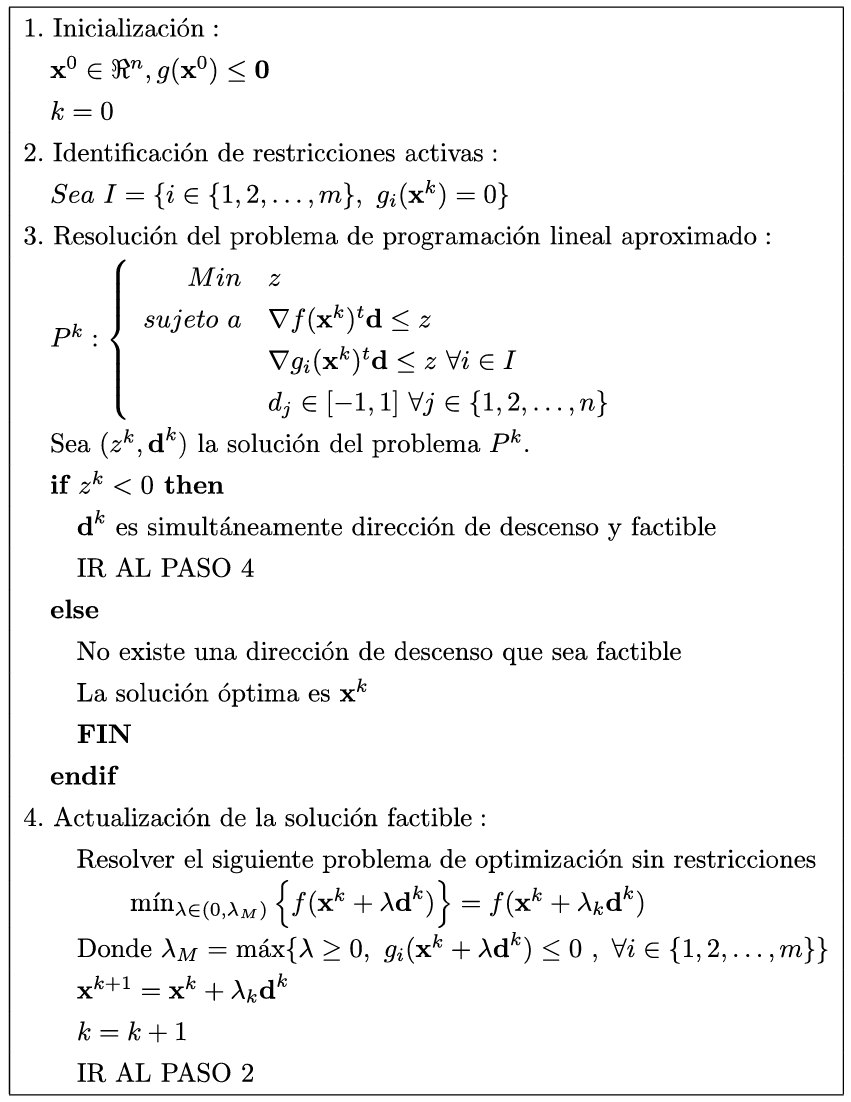

Definamos previamente todas las funciones auxiliares empleadas en el algoritmo:

Hacemos uso de la sección áurea (ya definida en la práctica 1, simplemente la copiamos en este nuevo cuaderno, que al ser corto el código era lo más eficaz) lo hemos utilizado en el algoritmo de Zoutendijk principalmente para resolver el problema de optimización unidimensional en la búsqueda del valor óptimo de λ en la dirección de descenso, con el fin de minimizar la función objetivo sin violar las restricciones.

La idea de hacer uso de la seccion aurea vino al ver un repositorio donde programaba este algoritmo con ella (este lo hace de manera totalmente diferente a nosotros), pero al mencionar el golden section method, empezamos a realizar pruebas con los diferentes métodos ya programados previamente en la primera entrega. Adjuntamos link del repositorio en cuestión: https://github.com/manish1596/Method_of_Zoutendijk/blob/master/main.py

In [ ]:
def seccion_aurea(x_min, x_max, eps,f):

    # Validar que el intervalo inicial es válido
    if x_min >= x_max:
        raise ValueError("El valor de x_min debe ser menor que x_max.")

    phi = (1 + math.sqrt(5)) / 2  # número áureo ~ 1.618

    # Inicializar puntos (la distancia entre ellos y los extremos del intervalo está en proporción áurea):
    a = x_max - ((x_max - x_min) / phi)
    b = x_min + ((x_max - x_min) / phi)

    iter = 0  # Contador de iteraciones

    optimo = (x_max + x_min) / 2

    while abs(x_max - x_min) > eps:
        if f(a) < f(b):
            x_max = b
            b = a
            a = x_max - ((x_max - x_min) / phi)
        else:
            x_min = a
            a = b
            b = x_min + ((x_max - x_min) / phi)


        # Hacemos la siguiente iteración
        iter += 1

        optimo=(x_max + x_min) / 2
    return x_min, x_max,optimo, iter

De la misma manera que hemos definido este método se podríamos haber empleado otros métodos como el de la bisección o el de Newton, que ya los vimos ambos como distintos métodos de resolución de problemas sin restricciones, mediante métodos de búsqueda y métodos iterativos respectivamente.

In [ ]:
def metodo_biseccion(f, x_min, x_max, eps):
    I_0 = x_max - x_min
    n_max = math.ceil(math.log(I_0 / eps, 2))  # Número máximo de iteraciones según la fórmula

    iter = 0  # parámetro que se irá actualizando, contando así el número de iteraciones necesarias.

    while iter < n_max:  # Criterio de parada basado en la precisión deseada
        x_medio = (x_min + x_max) / 2

        # Verificamos el valor de la función en los puntos de interés
        if abs(f(x_medio)) < eps:  # Criterio de parada cuando la función es suficientemente pequeña
            return x_min, x_max, x_medio, iter

        # Actualizamos los límites del intervalo dependiendo del signo de la función
        if f(x_min) * f(x_medio) < 0:
            x_max = x_medio  # El mínimo está entre x_min y x_medio
        else:
            x_min = x_medio  # El mínimo está entre x_medio y x_max

        iter += 1  # Incrementamos el contador de iteraciones

    # Devolvemos el valor aproximado de la raíz cuando se cumpla el criterio de número máximo de iteraciones
    return x_min, x_max, (x_min + x_max) / 2, iter

Para probar y ver como funcionan dichos métodos se puede consultar la práctica 1, donde hacemos uso de ellos en casos concretos de resolución de problemas.

La búsqueda del lambda máximo puede interpretarse como una búsqueda de una dirección ortogonal a las restricciones activas (en sentido figurado) para que el algoritmo no se "desplace" de forma ineficiente hacia áreas no factibles.
De esta manera, para calcular el lambda máximo empleamos las siguientes funciones definidas:

Lambda max con la sección aurea:

In [ ]:
def lambda_max_aurea(f, xk, dk, g_list, grad_g_funcs_list,tol=1e-6):
    lower = 0
    upper = 50  # Límite inicial razonable
    # Reducir el límite superior hasta encontrar un valor factible
    while upper > lower:
        x_new = xk + upper * dk
        if all(g(*x_new) <= 0 for g in g_list):
            break
        upper /= 2

    # Si no se encuentra un valor factible, error
    if upper <= lower:
        raise ValueError("No se encontró un intervalo factible para lambda.")

    # Ahora usamos la sección áurea para encontrar el lambda óptimo
    def objective_function(l):
        return f(* (xk + l * dk)) # Maximizar f equivale a minimizar -f

    lambda_max= seccion_aurea(lower, upper, tol, objective_function)[2]
    return lambda_max

Lambda max con el método de bisección:

In [ ]:
def lambda_max_biseccion(f, xk, dk, g_list, grad_g_funcs_list, tol=1e-6):
    lower = 0
    upper = 50  # Límite inicial razonable

    # Verificar factibilidad del límite superior
    while upper > lower:
        x_new = xk + upper * dk
        if all(g(*x_new) <= 0 for g in g_list):  # Cumple restricciones
            break
        upper /= 2  # Reducir el límite superior

    # Usar el método de bisección para encontrar lambda_max
    def objective_function(lmbd):
        return f(*(xk + lmbd * dk))  # Maximizar f equivale a minimizar -f

    _, _, lambda_max, _ = metodo_biseccion(objective_function, lower, upper, tol)
    return lambda_max

Además, hemos creado unas funciones para calcular derivadas simbólicas automáticamente y evaluar gradientes de funciones:

In [ ]:
def symbolic_gradient(f_sym, variables):
    """
    Calcula el gradiente simbólico de una función.
    f_sym: Función simbólica.
    variables: Lista de variables simbólicas.

    Devuelve una lista de funciones lambdified para las derivadas parciales.
    """
    grad = [diff(f_sym, var) for var in variables]
    grad_funcs = [lambdify(variables, partial) for partial in grad]
    return grad_funcs

def eval_gradient(grad_funcs, punto):
    """
    Evalúa el gradiente en un punto dado.
    grad_funcs: Lista de funciones de derivadas parciales.
    punto: Punto donde evaluar el gradiente.

    Devuelve el gradiente evaluado (arreglo NumPy).
    """
    return np.array([func(*punto) for func in grad_funcs])

Y finalmente llegamos al bloque de código principal, donde se define el algoritmo.

In [ ]:
def zoutendijk(f_sym, g_list_sym, x0, method,tol=1e-3, max_iter=100):

    """
    Implementa el algoritmo de Zoutendijk para resolver problemas de optimización con restricciones.

    Parámetros:
    -----------
    f : función objetivo que queremos minimizar. Se proporciona como una función simbólica (de tipo SymPy) para que el algoritmo pueda calcular derivadas simbólicas.

    g_list_sym : lista de funciones simbólicas que representan las restricciones del problema. Cada función debe ser una restricción de la forma g_i(x) ≤ 0.

    x0 : punto inicial desde el cual se comenzará el algoritmo. Este punto debe ser factible, es decir, debe cumplir las restricciones g_i(x0) ≤ 0.

    method : método que se utilizará para encontrar el valor óptimo de λ (lambda_max), que controla el tamaño del paso en cada iteración.
        Los posibles métodos incluyen: "sec_aurea"y "biseccion".

    tol : tolerancia para la convergencia del algoritmo.

    max_iter : número máximo de iteraciones del algoritmo. Si no se alcanza la convergencia antes de este número, el algoritmo terminará de manera prematura.

    Devuelve:
    --------
    Una tupla con el punto óptimo encontrado (xk) y el valor de la función objetivo en ese punto f(xk).
        es decir: (xk, f(xk))
    """

    # Declarar las variables simbólicas
    variables = list(f_sym.free_symbols)
    variables.sort(key=lambda x: str(x))  # Asegurar orden consistente de variables

    # Gradiente de la función objetivo
    grad_f_funcs = symbolic_gradient(f_sym, variables)

    # Gradientes de las restricciones
    grad_g_funcs_list = [symbolic_gradient(g_sym, variables) for g_sym in g_list_sym]

    # Conversión de funciones simbólicas a funciones evaluables
    f = lambdify(variables, f_sym)
    g_list = [lambdify(variables, g_sym) for g_sym in g_list_sym]

    # diccionario para mapear el método a usar
    mapeo_metodo = {
        "sec_aurea": lambda_max_aurea,
        "biseccion": lambda_max_biseccion
        }


    funcion_metodo = mapeo_metodo.get(method)
    if funcion_metodo is None:
        raise ValueError(f"Invalid method: {method}")


    # Paso 1: Inicialización
    xk = np.array(x0)
    # Vemos si el punto inicial dado cumple las restricciones del problema:
    xk = np.array(x0)
    for i, g in enumerate(g_list):
        if g(*xk) > 0:  # Restricción no satisfecha
            raise ValueError(f"El punto inicial {x0} no cumple la restricción {i}: g{i}(x) = {g(*xk)} > 0")


    k = 0 # contador de iteraciones
    n = len(x0)
    dk = -np.array([1, 1])  # Dirección de descenso inicial


    while k < max_iter:
        print(f"Iteración {k}: xk = {xk}")

        # Paso 2: Identificación de restricciones activas
        active_constraints = [i for i, g in enumerate(g_list) if abs(g(*xk)) <= tol]

        # Paso 3: Resolución del problema de programación lineal aproximado
        prob = LpProblem("Zoutendijk_Linear_Approximation", LpMinimize)

        # Variables de decisión: z y d (vector d con n variables)
        z = LpVariable("z", cat="Continuous")
        d = [LpVariable(f"d_{i}", lowBound=-1, upBound=1, cat="Continuous") for i in range(n)]

        # Restricción: ∇f(xk)ᵀd ≤ z
        grad_f_at_xk = eval_gradient(grad_f_funcs, xk)
        prob += lpSum([grad_f_at_xk[i] * d[i] for i in range(n)]) <= z

        # Restricciones activas: ∇gi(xk)ᵀd ≤ z para todas las gi activas
        for i in active_constraints:
            grad_g_at_xk = eval_gradient(grad_g_funcs_list[i], xk)
            prob += lpSum([grad_g_at_xk[j] * d[j] for j in range(n)]) <= z

        # Función objetivo: minimizar z
        prob += z

        # Resolver el problema de programación lineal
        prob.solve(PULP_CBC_CMD(msg=False))

        if z.varValue is None or z.varValue >= 0:  # No hay dirección de descenso factible
            print("No hay dirección de descenso factible. Óptimo encontrado.")
            break

        # Dirección de descenso factible
        dk = np.array([var.varValue for var in d])

        # Paso 4: Cálculo de λ máximo usando el método especificado
        lambda_max_func = mapeo_metodo.get(method)
        if lambda_max_func is None:
           raise ValueError(f"Invalid method: {method}")

        lambda_max = lambda_max_func(f, xk, dk, g_list, grad_g_funcs_list)
        if lambda_max == 0:
            print("No se encontró un paso factible. Terminando.")
            break

        # Actualizar xk
        xk = xk + lambda_max * dk
        k += 1

        # Verificar convergencia
        if np.linalg.norm(dk) < tol:
            print("Convergencia alcanzada.")
            break

    return xk, f(*xk)

#### a) Aplícalo al problema 𝑃2, partiendo de diferentes puntos. Sugiero los siguientes: (−0.5,−0.5),(0.5,0.5),(2,1)

In [ ]:
# Declarar variables simbólicas
x1, x2 = symbols('x1 x2')

# función objetivo:
f_sym = 2*x1 - x2

# restricciones:
g1_sym = -x1**2 + x2
g2_sym = (x1 - 1)**2 + x2 - 5
g3_sym = -x2


# Punto inicial
x0=[-0.5,-0.5]
x1=[0.5,0.5]
x2 = [2, 1] # ya vimos que es el unico factible de los 3, con los otros dos nos devuelve un error por no cumplir las restricciones del problema dado.

# Usar todos los métodos posibles para lambda_max:

# Método 1: Sección Áurea
print("Usando método de la sección áurea:")
opt_x_aurea, opt_f_aurea = zoutendijk(f_sym, [g1_sym, g2_sym, g3_sym], x2, method="sec_aurea")
print("Punto óptimo:", opt_x_aurea)
print("Valor óptimo de la función objetivo:", opt_f_aurea)

# Método 2: Bisección
print("\nUsando método de bisección:")
opt_x_biseccion, opt_f_biseccion = zoutendijk(f_sym, [g1_sym, g2_sym, g3_sym], x2, method="biseccion")
print("Punto óptimo:", opt_x_biseccion)
print("Valor óptimo de la función objetivo:", opt_f_biseccion)


Usando método de la sección áurea:
Iteración 0: xk = [2 1]
Iteración 1: xk = [1.60937544 1.39062456]
Iteración 2: xk = [1.4140633 1.5859367]
Iteración 3: xk = [1.31640753 1.68359247]
Iteración 4: xk = [1.3042009 1.6957991]
Iteración 5: xk = [1.30343841 1.69656159]
Iteración 6: xk = [1.30305731 1.69694269]
Iteración 7: xk = [1.30286705 1.69713295]
Iteración 8: xk = [1.98136892 3.25963253]
Iteración 9: xk = [1.88371314 3.35728831]
Iteración 10: xk = [1.85929957 3.38170187]
Iteración 11: xk = [1.84709295 3.3939085 ]
Iteración 12: xk = [1.84404161 3.39695983]
Iteración 13: xk = [1.84366051 3.39734093]
Iteración 14: xk = [1.84347026 3.39753119]
Iteración 15: xk = [1.98084625 3.78815574]
Iteración 16: xk = [1.95643269 3.81256931]
Iteración 17: xk = [1.95338136 3.81562064]
Iteración 18: xk = [1.98644711 3.91327642]
Iteración 19: xk = [1.98034392 3.91937961]
Iteración 20: xk = [1.97996282 3.91976071]
Iteración 21: xk = [1.99634817 3.96858845]
Iteración 22: xk = [1.99329684 3.97163979]
Iteració

In [ ]:
# Comparar resultados
if opt_f_aurea < opt_f_biseccion:
    print("\nEl método de la sección áurea encontró un mínimo menor.")
    print(f"Valor mínimo: {opt_f_aurea} en el punto: {opt_x_aurea}")
else:
    print("\nEl método de bisección encontró un mínimo menor.")
    print(f"Valor mínimo: {opt_f_biseccion} en el punto: {opt_x_biseccion}")

# En caso de que ambos sean iguales
if abs(opt_f_aurea - opt_f_biseccion) < 1e-6:
    print("\nAmbos métodos encontraron el mismo valor mínimo (dentro de la tolerancia).")


El método de bisección encontró un mínimo menor.
Valor mínimo: 0.0006238016146493663 en el punto: [2.0000551 3.9994864]


In [ ]:
# hagamos los ejemplos para los puntos no factibles, nos saldrá error en los siguientes dos bloques de código

x0=[-0.5,-0.5]
print("Usando método de la sección áurea:")
opt_x, opt_f = zoutendijk(f_sym, [g1_sym, g2_sym, g3_sym], x0, method="sec_aurea")
print("Punto óptimo:", opt_x)
print("Valor óptimo de la función objetivo:", opt_f)

Usando método de la sección áurea:


ValueError: El punto inicial [-0.5, -0.5] no cumple la restricción 2: g2(x) = 0.5 > 0

In [ ]:
x1=[0.5,0.5]
print("Usando método de la sección áurea:")
opt_x_1, opt_f_1 = zoutendijk(f_sym, [g1_sym, g2_sym, g3_sym], x1, method="sec_aurea")
print("Punto óptimo:", opt_x_1)
print("Valor óptimo de la función objetivo:", opt_f_1)

#### b) Aplícalo al problema de Bazaraa visto antes.  

In [ ]:
# Definir las variables simbólicas
x1, x2 = sp.symbols('x1 x2')

# Función objetivo simbólica: 2x^2 + 2y^2 - 2xy - 4x - 6y
f_b = 2*x1**2 + 2*x2**2 - 2*x1*x2 - 4*x1 - 6*x2

# Restricciones simbólicas:
g1_b = x1 + 5*x2 - 5      # x + 5y <= 5
g2_b = 2*x1**2 - x2       # 2x^2 - y <= 0
g3_b = -x1                 # x >= 0  # Changed to -x1 <= 0
g4_b = -x2                 # y >= 0  # Changed to -x2 <= 0



x0 = [0.3, 0.8] # Punto inicial dentro de la región factible, lo podemos ver en el primer gráfico dado en este cuaderno (es un punto dentro del área azul, la factible)

# ejemplo con punto factible y seccion aurea
opt_x_aurea_b, opt_f_aurea_b = zoutendijk(f_b, [g1_b,g2_b,g3_b,g4_b], x0, method="sec_aurea")
print("Punto óptimo:", opt_x_aurea_b)
print("Valor óptimo de la función objetivo:", opt_f_aurea_b)

# ejemplo con punto factible y método de bisección
opt_x_bisec_b, opt_f_bisec_b = zoutendijk(f_b, [g1_b,g2_b,g3_b,g4_b], x0, method="biseccion")
print("Punto óptimo:", opt_x_bisec_b)
print("Valor óptimo de la función objetivo:", opt_f_bisec_b)

In [ ]:
# Comparar resultados
if  opt_f_aurea_b < opt_f_bisec_b:
    print("\nEl método de la sección áurea encontró un mínimo menor.")
    print(f"Valor mínimo: {opt_f_aurea_b} en el punto: {opt_x_aurea_b}")
else:
    print("\nEl método de bisección encontró un mínimo menor.")
    print(f"Valor mínimo: {opt_f_bisec_b} en el punto: {opt_x_bisec_b}")

# En caso de que ambos sean iguales
if abs(opt_f_aurea_b - opt_f_bisec_b) < 1e-6:
    print("\nAmbos métodos encontraron el mismo valor mínimo (dentro de la tolerancia).")

In [ ]:
x1=[1,0] # ejemplo con punto no factible, nos saldrá un error
opt_x, opt_f = zoutendijk(f_b, [g1_b,g2_b,g3_b,g4_b], x1, method="biseccion") # nos da error porque obviamento hemos cogido un punto fuera del área factible, y así nos lo indica
print("Punto óptimo:", opt_x)
print("Valor óptimo de la función objetivo:", opt_f)

### Conclusiones del ejercicio 2:
Vemos que aunque por muy poca diferencia, buscar el lambda óptimo para este algoritmo es más efectivo empleando el método de bisección que el de la sección áurea.

# Ejercicio 3: (opcional)

Continuando el ejercicio 2 de la práctica anterior, ajusta la recta de regresión para los datos de dicho ejercicio fijando como criterio a minimizar la distancia ortogonal entre la curva y la nube de puntos.

In [ ]:
# Datos
X = np.array([4.5, 5.0, 5.1, 5.3, 6.2, 7.1])
Y = np.array([5.0, 3.8, 4.9, 3.7, 3.6, 15.0])


def ortogonal(params):
    alpha, beta = params
    distancias = np.abs(Y - (alpha + beta * X)) / np.sqrt(1 + beta**2)  # Distancias ortogonales
    return np.sum(distancias)

# Valores iniciales para alpha y beta
parametros_iniciales = [0, 1]

# Minimizar la función
resultado = minimize(ortogonal, parametros_iniciales, method='BFGS')

# Resultados
alpha_opt, beta_opt = resultado.x
print(f"Alpha óptimo: {alpha_opt:.2f}, Beta óptimo: {beta_opt:.2f}")

# Calcular los valores predichos para la recta ajustada
Y_ortogonal = alpha_opt + beta_opt * X

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='black', label='Datos')
plt.plot(X, Y_ortogonal, color='orange', linestyle='--', label=f'Regresión ortogonal: Y = {alpha_opt:.2f} + {beta_opt:.2f}X')
plt.title("Ajuste de la recta de regresión ortogonal")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

Intentamos resolverlo con pulp pero nos daba fallo (por los $\beta^2$)

> PuLP does not allow directly multiplying decision variables (which are non-constant expressions) within a constraint.

Así que al menos lo intentamos con minimize, por ver como quedaba.

Lo obtenido en la otra práctica:

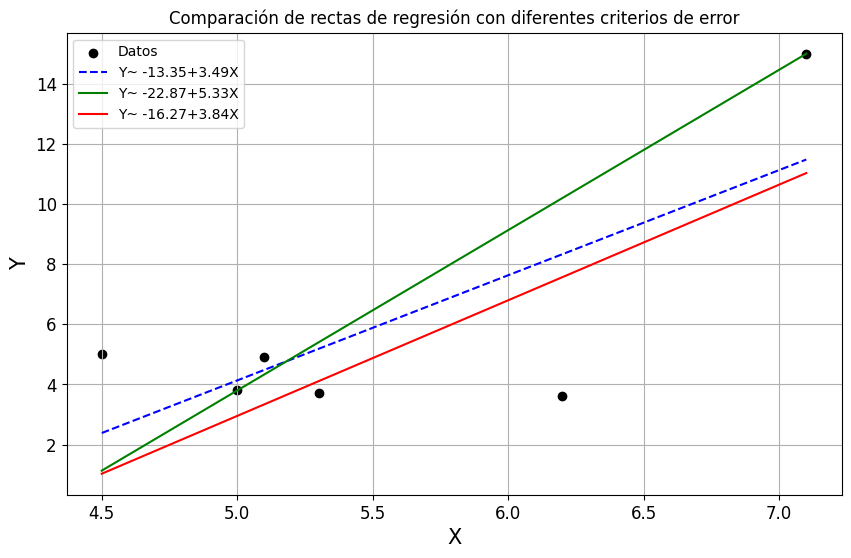

In [ ]:
# Definir las variables simbólicas
x1, x2 = sp.symbols('x1 x2', real=True)

# Función objetivo simbólica:
f_b1 = -x1+ 2*x2

# Restricciones simbólicas:
g1_b = 4*x1 **2 + 9*x2**2  -36
g2_b = -(x1 -2)**2  - x2**2 +4
g3_b = - x1
g4_b = -x2

res=[g1_b,g2_b]


x0 = [0,-1] # Punto inicial dentro de la región factible, lo podemos ver en el primer gráfico dado en este cuaderno (es un punto dentro del área azul, la factible)
x1=[1.1,1.8]
# ejemplo con punto factible y seccion aurea
opt_x_aurea_b, opt_f_aurea_b = zoutendijk(f_b1, [g1_b,g2_b], x0, method="biseccion")
print("Punto óptimo:", opt_x_aurea_b)
print("Valor óptimo de la función objetivo:", opt_f_aurea_b)

# ejemplo con punto factible y seccion aurea
opt_x_aurea_b1, opt_f_aurea_b1 = zoutendijk(f_b1, [g1_b,g2_b], x1, method="biseccion")
print("Punto óptimo:", opt_x_aurea_b1)
print("Valor óptimo de la función objetivo:", opt_f_aurea_b1)

Iteración 0: xk = [ 0 -1]
Iteración 1: xk = [ 0.78124963 -1.78124963]
Iteración 2: xk = [ 0.8789055 -1.8789055]
Iteración 3: xk = [ 0.90331919 -1.90331919]
Iteración 4: xk = [ 0.90637058 -1.90637058]
Iteración 5: xk = [ 0.90646558 -1.90646558]
Iteración 6: xk = [ 0.90648904 -1.90648904]
Iteración 7: xk = [ 1.00414492 -1.88429965]
Iteración 8: xk = [ 1.00433528 -1.88449002]
Iteración 9: xk = [ 1.0043826  -1.88453733]
Iteración 10: xk = [ 1.00440606 -1.8845608 ]
Iteración 11: xk = [ 1.10206194 -1.85999806]
Iteración 12: xk = [ 1.10215694 -1.86009305]
Iteración 13: xk = [ 1.10218041 -1.86011652]
Iteración 14: xk = [ 1.15100816 -1.8466065 ]
Iteración 15: xk = [ 1.15119852 -1.84679687]
Iteración 16: xk = [ 1.15124583 -1.84684418]
Iteración 17: xk = [ 1.1512693  -1.84686765]
Iteración 18: xk = [ 1.17568299 -1.83979495]
Iteración 19: xk = [ 1.17577799 -1.83988994]
Iteración 20: xk = [ 1.1758253  -1.83993725]
Iteración 21: xk = [ 1.17584877 -1.83996072]
Iteración 22: xk = [ 1.18805543 -1.83634

In [ ]:
x, y = symbols('x y', real=True)

# Función objetivo
f = -x + 2*y

g1 = 4*x**2 + 9*y**2 - 36  # g1(x, y) <= 0
g2 = -((x - 2)**2 + y**2 - 4)  # g2(x, y) >= 0 -> -g2 <= 0

res=[g1,g2]

puntos=kkt_solver_1(f,res,[x,y])